# 숫자 분류 모델 제작
- MNIST 데이터셋으로부터 학습함
- 참고자료: https://keras.io/examples/vision/mnist_convnet

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

## 데이터 가져오기
- keras에서 제공하는 MNIST 데이터셋 사용

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## 데이터 살펴보기

In [ ]:
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

## 데이터 전처리
- [0, 255] 범위의 정수를 [0, 1] 범위의 실수로 변환
- Keras API에 사용하기 위해 행렬을 28x28에서 28x28x1로 변환
- y값에 one hot encoding을 적용함

In [14]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255
x_test = x_test.reshape(-1, 28, 28, 1) / 255
x_train.shape, x_train.dtype

((60000, 28, 28, 1), dtype('float64'))

In [15]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_train.dtype

((60000, 10), dtype('float32'))

## 모델 구성

In [16]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM

kernel_size = (3, 3)

model = Sequential([
    Conv2D(32, kernel_size, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

## 모델 학습
- 검증 데이터 기준 98% 정확도

In [17]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/15


2023-07-31 16:19:05.864322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.3319 - accuracy: 0.8982

2023-07-31 16:19:14.489108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 10s 20ms/step - loss: 0.3319 - accuracy: 0.8982 - val_loss: 0.1004 - val_accuracy: 0.9695
Epoch 2/15
469/469 [==============================] - 9s 18ms/step - loss: 0.1058 - accuracy: 0.9685 - val_loss: 0.0587 - val_accuracy: 0.9830
Epoch 3/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0786 - accuracy: 0.9749 - val_loss: 0.0450 - val_accuracy: 0.9847
Epoch 4/15
469/469 [==============================] - 9s 18ms/step - loss: 0.0662 - accuracy: 0.9793 - val_loss: 0.0398 - val_accuracy: 0.9865
Epoch 5/15
469/469 [==============================] - 9s 18ms/step - loss: 0.0577 - accuracy: 0.9818 - val_loss: 0.0386 - val_accuracy: 0.9873
Epoch 6/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0506 - accuracy: 0.9841 - val_loss: 0.0347 - val_accuracy: 0.9884
Epoch 7/15
469/469 [==============================] - 9s 18ms/step - loss: 0.0470 - accuracy: 0.9855 - val_loss: 0.0314 - val_accuracy: 0.9897
Epoch 8/1

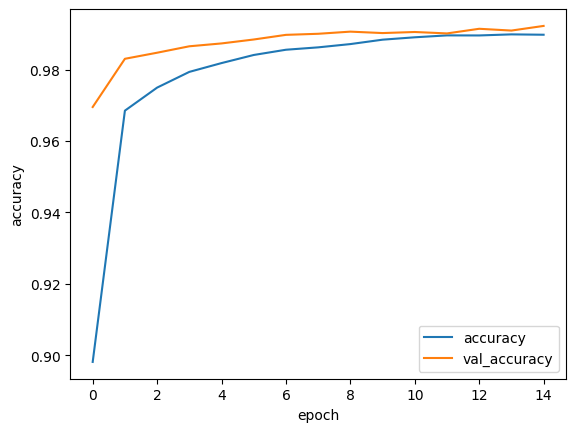

In [18]:
# draw accuracy and val_accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 모델 저장

In [19]:
model.save("../model.keras")